uint8


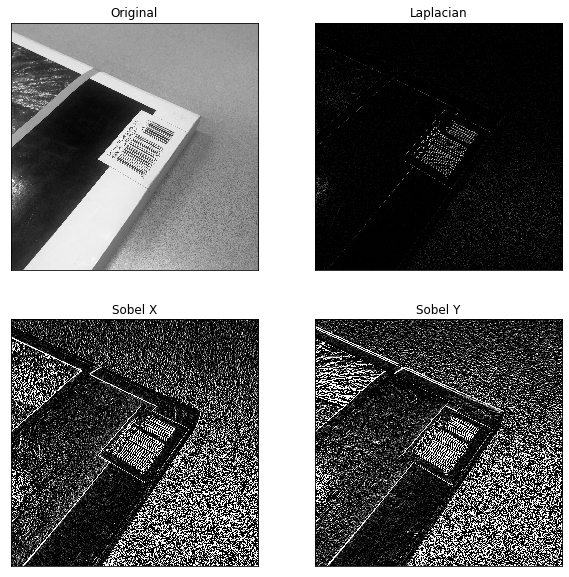

True

In [59]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('ISBN_rotated2.jpg',0)
print(img.dtype)
#laplacian = cv.Laplacian(img,cv.CV_64F)
laplacian = cv2.Laplacian(img,-1)
#sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobelx = cv2.Sobel(img,-1,1,0,ksize=5)
#sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
sobely = cv2.Sobel(img,-1,0,1,ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('laplacian.jpg', laplacian)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


True

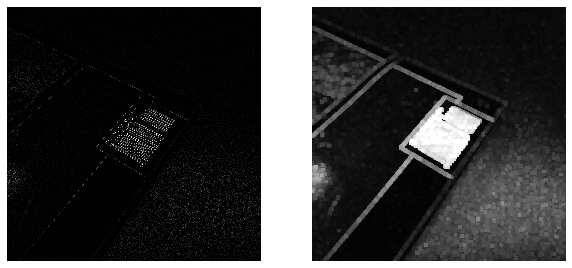

In [60]:
img = cv2.imread('laplacian.jpg',0)

kernel = np.ones((20,20),np.uint8)
print(kernel)

dilation = cv2.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(10,5))
plt.subplot('121')
plt.imshow(img,cmap='gray'), plt.axis('off')
plt.subplot('122')
plt.imshow(dilation,cmap='gray'), plt.axis('off')

cv2.imwrite('laplacian_dil.jpg', dilation)

In [61]:
gradX = cv2.Sobel(dilation, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(dilation, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

 
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)


blurred = cv2.GaussianBlur(gradient, (9,9),0)
(_, thresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)



closed = cv2.erode(thresh, None, iterations = 4)
closed = cv2.dilate(thresh, None, iterations = 4)


cnts, hierarchy = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
 

cv2.drawContours(img, [box], -1, (0, 255, 0), 2)
#cv2.imshow("image",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#cv2_imshow(gradient)
#cv2_imshow(blurred)
#cv2_imshow(thresh)
#cv2_imshow(closed)

img_crop = img[box[2][1]:box[0][1], box[1][0]:box[3][0]]
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [62]:
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('ISBN_rotated1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

decoded = pyzbar.decode(gray)

decoded

[Decoded(data=b'9788992603270', type='EAN13', rect=Rect(left=636, top=595, width=242, height=146), polygon=[Point(x=636, y=595), Point(x=636, y=609), Point(x=637, y=675), Point(x=638, y=739), Point(x=755, y=741), Point(x=878, y=740), Point(x=877, y=730), Point(x=875, y=712), Point(x=863, y=612), Point(x=861, y=596)])]

In [63]:
for d in decoded:
    print(d.data)

b'9788992603270'


In [64]:
isbn = d.data.decode()

import os
import sys
import urllib.request
client_id = "8D2K86C4CHALYlPkI6Jx"
client_secret = "DaMxMtHnrD"
encText = urllib.parse.quote(isbn)
url = "https://openapi.naver.com/v1/search/book?query=" + encText # json 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Fri, 29 Nov 2019 05:26:20 +0900",
"total": 1,
"start": 1,
"display": 1,
"items": [
{
"title": "마스터톤의 기본일반화학",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=6202168",
"image": "https://bookthumb-phinf.pstatic.net/cover/062/021/06202168.jpg?type=m1&udate=20141122",
"author": "William L. Masterton|CECILE N. HURLY",
"price": "32000",
"discount": "32000",
"publisher": "사이플러스",
"pubdate": "20100301",
"isbn": "8992603274 <b>9788992603270</b>",
"description": "화학에 대한 주제를 간단명료하게 설명하고자 한 마스터톤 일반화학을 소개하는 교재 &lt;마스터톤의 기본 일반화학&gt;. 물질과 측정, 원자, 분자, 이온 및 화학양론, 열화학, 액체와 고체, 용액, 배위 화합물 등을 간결하면서도 명확하게 설명하고 있는 마스터톤의 기본 일반화학에 대해 알아보자."

}
]
}

